In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/exoplanet1.csv")

df.head()


/tmp/ipython-input-810345687.py:7: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/exoplanet1.csv")


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_dr2_id,gaia_dr3_id,default_flag,...,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,1,...,19-09-2023,2023-08,19-09-2023,2,1,2,0,0,0,0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,14-05-2014,2008-01,14-05-2014,2,1,2,0,0,0,0
2,3,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,Gaia DR3 3946945413106333696,0,...,23-07-2014,2011-08,23-07-2014,2,1,2,0,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,0,...,25-04-2018,2009-10,14-05-2014,0,1,1,0,0,0,0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,Gaia DR3 1696798367260229376,1,...,04-09-2018,2017-03,06-09-2018,0,1,1,0,0,0,0


In [ ]:
df.shape

(39212, 289)

In [ ]:
df.describe()

,rowid,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,disc_year,rv_flag,pul_flag,ptv_flag,...,sy_kepmag,sy_kepmagerr1,sy_kepmagerr2,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec,pl_ndispec
count,39212.000000,39212.000000,39212.000000,39212.000000,39212.0,39212.000000,39212.000000,39212.000000,39212.000000,39212.000000,...,31184.000000,0.0,0.0,39212.000000,39212.000000,39212.000000,39212.000000,39212.000000,39212.000000,39212.000000
mean,19606.500000,0.154672,1.085153,1.918622,0.0,0.002397,2015.535346,0.250867,0.000332,0.000051,...,14.110709,NaN,NaN,1.023488,0.473656,0.196394,0.110043,0.109099,0.215750,0.005432
std,11319.673714,0.361596,0.308205,1.238585,0.0,0.048903,4.001613,0.433518,0.018205,0.007142,...,1.440547,NaN,NaN,1.124557,3.814592,0.887957,0.777777,0.932077,1.586463,0.153661
min,1.000000,0.000000,1.000000,1.000000,0.0,0.000000,1992.000000,0.000000,0.000000,0.000000,...,5.973000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9803.750000,0.000000,1.000000,1.000000,0.0,0.000000,2014.000000,0.000000,0.000000,0.000000,...,13.352000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19606.500000,0.000000,1.000000,1.000000,0.0,0.000000,2016.000000,0.000000,0.000000,0.000000,...,14.415000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,29409.250000,0.000000,1.000000,2.000000,0.0,0.000000,2016.000000,1.000000,0.000000,0.000000,...,15.212000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39212.000000,1.000000,4.000000,8.000000,0.0,1.000000,2026.000000,1.000000,1.000000,1.000000,...,17.475000,NaN,NaN,16.000000,70.000000,12.000000,13.000000,19.000000,32.000000,6.000000


In [ ]:
selected_cols = [
    'pl_rade',      # Planet radius (Earth radii)
    'pl_bmasse',     # Planet mass (Earth mass)
    'pl_dens',      # Planet density (g/cm^3)
    'pl_eqt',       # Equilibrium temperature (K)
    'pl_orbper',    # Orbital period (days)
    'sy_dist',      # Distance from host star (pc)
    'st_spectype',  # host star type/spectral type
    'st_lum',       # Stellar Luminosity (log(solar))
    'st_teff',      # Stellar effective temperature (K)
    'st_met'        # Stellar metallicity (dex)
]

df = df[selected_cols]
df.head()


,pl_rade,pl_bmasse,pl_dens,pl_eqt,pl_orbper,sy_dist,st_spectype,st_lum,st_teff,st_met
0,NaN,4914.898486,NaN,NaN,323.21000,93.1846,G8 III,1.97823,4874.0,-0.26
1,NaN,6165.600000,NaN,NaN,326.03000,93.1846,G8 III,2.24300,4742.0,-0.35
2,NaN,5434.700000,NaN,NaN,NaN,93.1846,NaN,NaN,NaN,NaN
3,NaN,3337.070000,NaN,NaN,516.22000,125.3210,K4 III,NaN,4340.0,0.04
4,NaN,4684.814200,NaN,NaN,516.21997,125.3210,NaN,NaN,4213.0,-0.02


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
pl_dens,36489
st_spectype,36312
pl_bmasse,32119
st_lum,29562
pl_eqt,22020
st_met,14435
pl_rade,12180
st_teff,3485
pl_orbper,3291
sy_dist,845


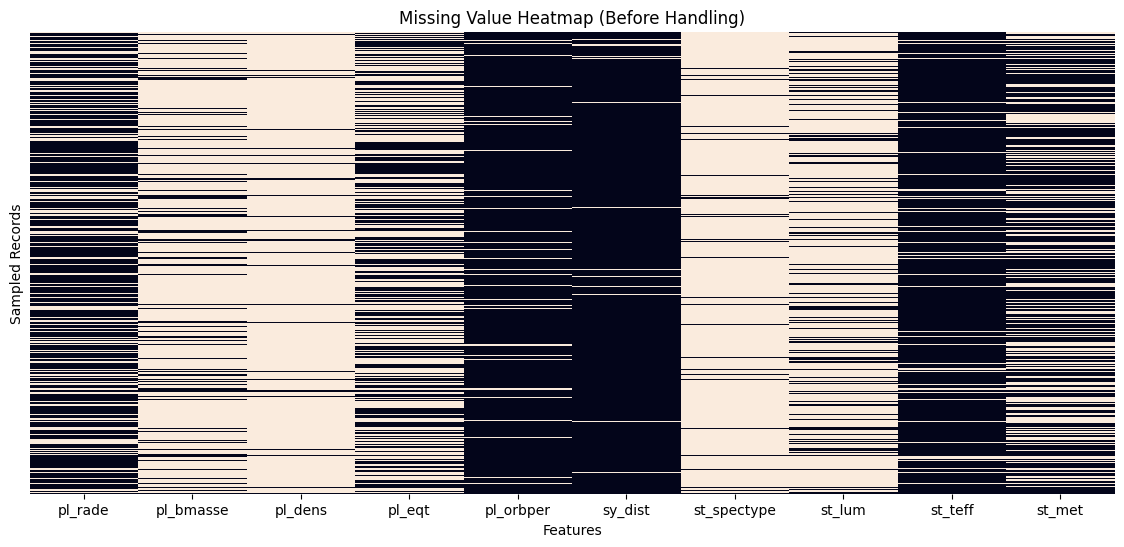

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

sns.heatmap(
    df.sample(2000, random_state=42).isnull(),
    cbar=False,
    yticklabels=False
)

plt.title("Missing Value Heatmap (Before Handling)")
plt.xlabel("Features")
plt.ylabel("Sampled Records")
plt.show()


In [ ]:
num_cols = [
    'pl_rade', 'pl_bmasse', 'pl_dens', 'pl_eqt','pl_orbper', 'sy_dist','st_lum','st_teff', 'st_met'
]

cat_cols = ['st_spectype']

In [ ]:
# Numerical columns
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


/tmp/ipython-input-1401815232.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
pl_rade,0
pl_bmasse,0
pl_dens,0
pl_eqt,0
pl_orbper,0
sy_dist,0
st_spectype,0
st_lum,0
st_teff,0
st_met,0


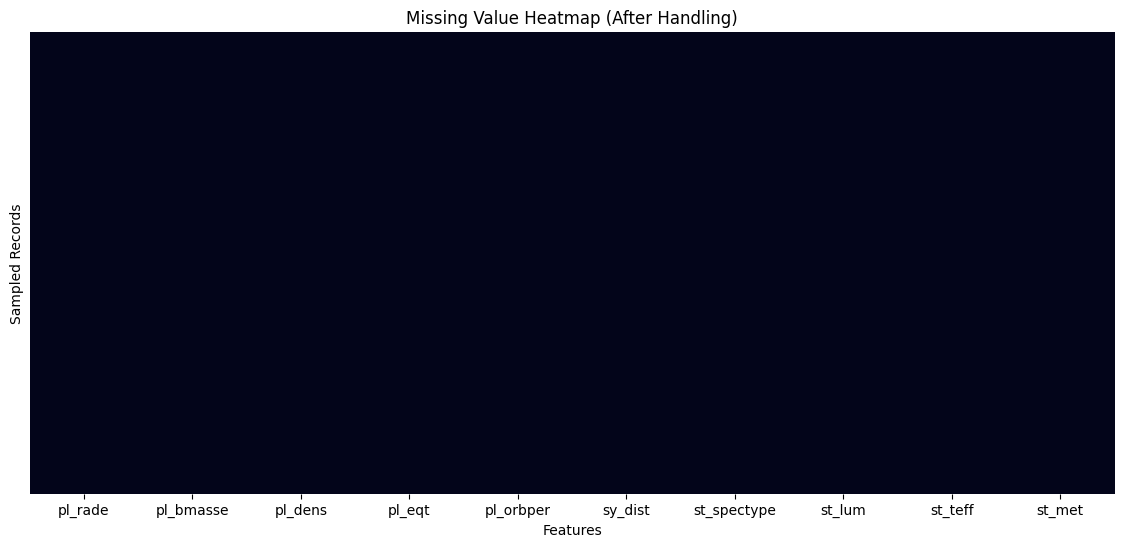

In [ ]:
plt.figure(figsize=(14,6))

sns.heatmap(
    df.sample(2000, random_state=42).isnull(),
    cbar=False,
    yticklabels=False
)

plt.title("Missing Value Heatmap (After Handling)")
plt.xlabel("Features")
plt.ylabel("Sampled Records")
plt.show()


In [ ]:
df['st_spectral_class'] = df['st_spectype'].str.extract(r'([OBAFGKM])')
df['st_spectral_class'] = df['st_spectral_class'].fillna('Other')

In [ ]:
df.drop(columns=['st_spectype'], inplace=True)

In [ ]:
df = pd.get_dummies(
    df,
    columns=['st_spectral_class'],
    drop_first=True
)


In [ ]:
df.head()

,pl_rade,pl_bmasse,pl_dens,pl_eqt,pl_orbper,sy_dist,st_lum,st_teff,st_met,st_spectral_class_B,st_spectral_class_F,st_spectral_class_G,st_spectral_class_K,st_spectral_class_M,st_spectral_class_Other
0,2.3,4914.898486,1.32,797.0,323.21000,93.1846,1.978230,4874.0,-0.2600,False,False,True,False,False,False
1,2.3,6165.600000,1.32,797.0,326.03000,93.1846,2.243000,4742.0,-0.3500,False,False,True,False,False,False
2,2.3,5434.700000,1.32,797.0,10.33760,93.1846,-0.081725,5613.0,-0.0025,False,False,True,False,False,False
3,2.3,3337.070000,1.32,797.0,516.22000,125.3210,-0.081725,4340.0,0.0400,False,False,False,True,False,False
4,2.3,4684.814200,1.32,797.0,516.21997,125.3210,-0.081725,4213.0,-0.0200,False,False,True,False,False,False


In [ ]:
# Convert all boolean columns to 0/1
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)
df.head(20)

,pl_rade,pl_bmasse,pl_dens,pl_eqt,pl_orbper,sy_dist,st_lum,st_teff,st_met,st_spectral_class_B,st_spectral_class_F,st_spectral_class_G,st_spectral_class_K,st_spectral_class_M,st_spectral_class_Other
0,2.3,4914.898486,1.32,797.0,323.21000,93.1846,1.978230,4874.00,-0.2600,0,0,1,0,0,0
1,2.3,6165.600000,1.32,797.0,326.03000,93.1846,2.243000,4742.00,-0.3500,0,0,1,0,0,0
2,2.3,5434.700000,1.32,797.0,10.33760,93.1846,-0.081725,5613.00,-0.0025,0,0,1,0,0,0
3,2.3,3337.070000,1.32,797.0,516.22000,125.3210,-0.081725,4340.00,0.0400,0,0,0,1,0,0
4,2.3,4684.814200,1.32,797.0,516.21997,125.3210,-0.081725,4213.00,-0.0200,0,0,1,0,0,0
5,2.3,3432.400000,1.32,797.0,10.33760,125.3210,-0.081725,5613.00,-0.0025,0,0,1,0,0,0
6,2.3,1017.000000,1.32,797.0,10.33760,75.4392,-0.081725,5613.00,-0.0025,0,0,1,0,0,0
7,2.3,1131.151301,1.32,797.0,186.76000,75.4392,1.839920,4888.00,-0.2100,0,0,0,1,0,0
8,2.3,1525.500000,1.32,797.0,185.84000,75.4392,1.763000,4813.00,-0.2400,0,0,0,1,0,0
9,2.3,2559.472162,1.32,797.0,1765.03890,17.9323,-0.081725,5613.00,-0.0025,0,0,1,0,0,0


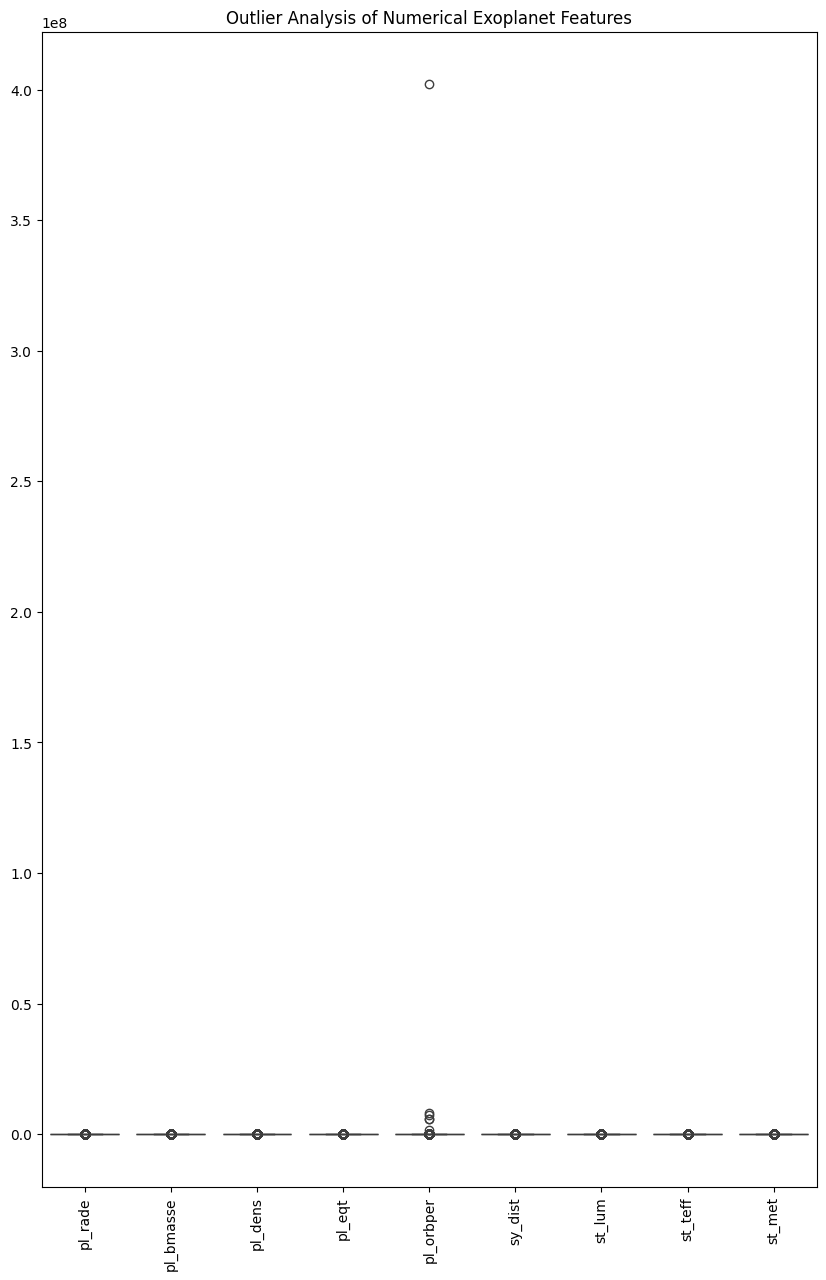

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,15))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=90)
plt.title("Outlier Analysis of Numerical Exoplanet Features")
plt.show()


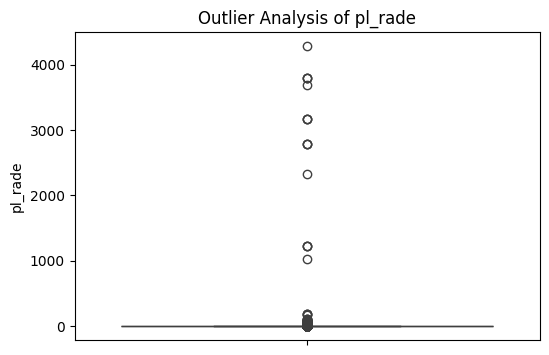

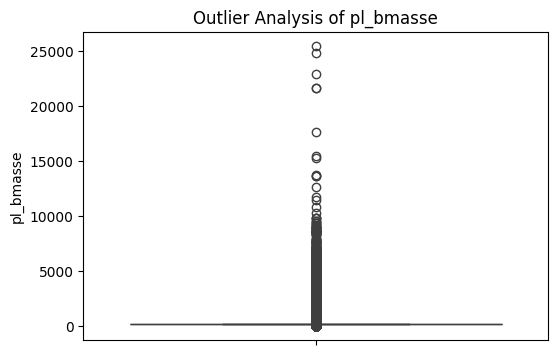

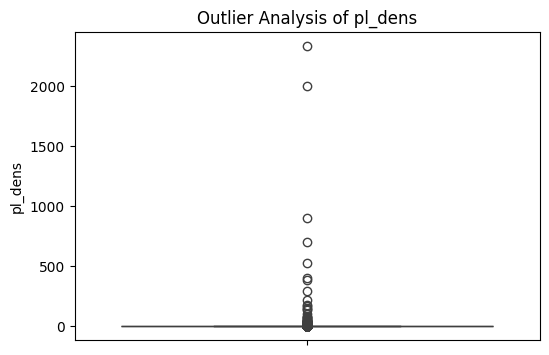

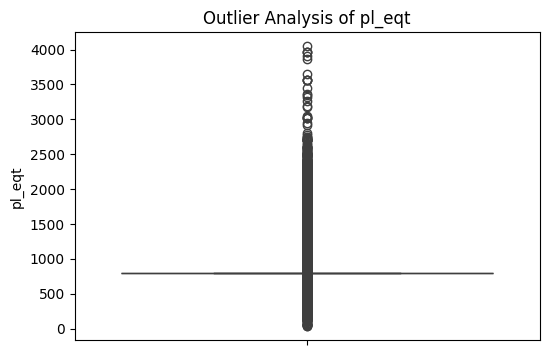

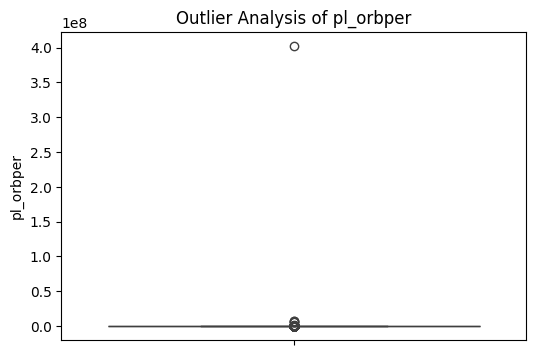

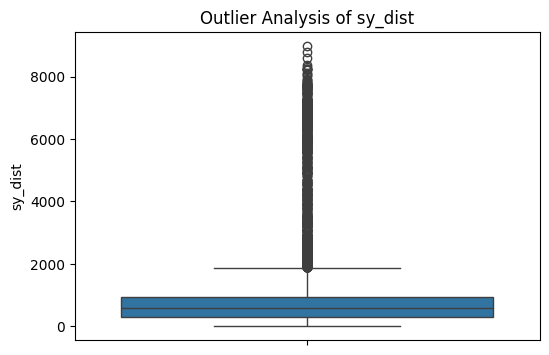

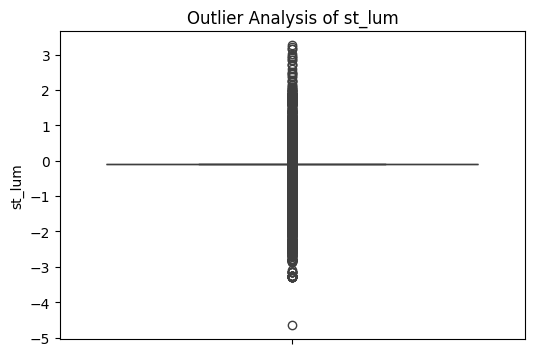

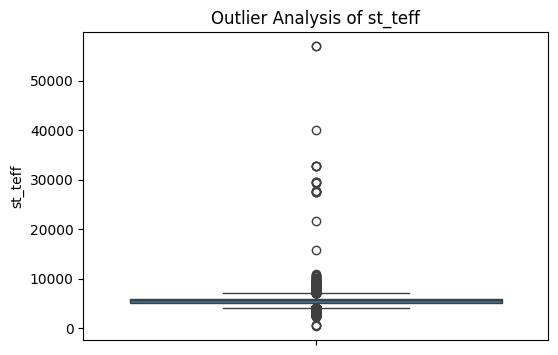

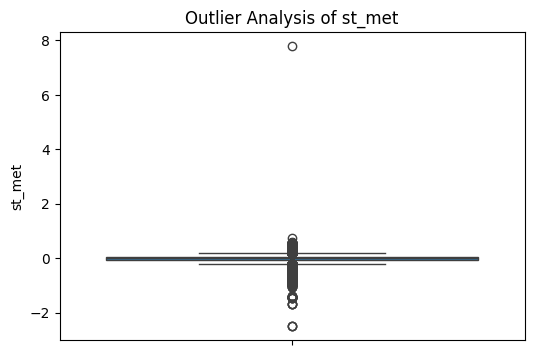

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Outlier Analysis of {col}")
    plt.ylabel(col)
    plt.show()


In [ ]:
df.shape

(39212, 15)

In [ ]:
from scipy.stats.mstats import winsorize

df_wins = df.copy()

for col in num_cols:
    df_wins[col] = winsorize(df_wins[col], limits=[0.03, 0.03])




In [ ]:
df[num_cols] = df_wins[num_cols]
print("Final dataset shape:", df.shape)


Final dataset shape: (39212, 15)


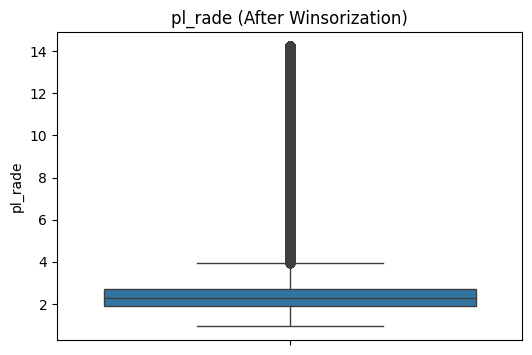

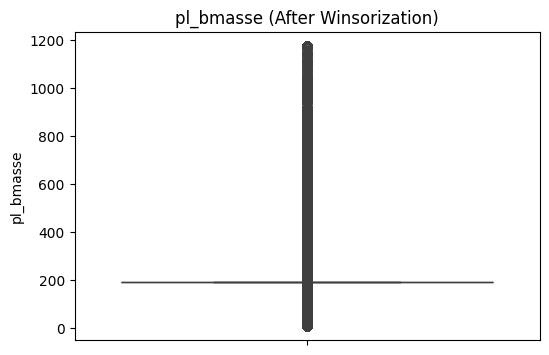

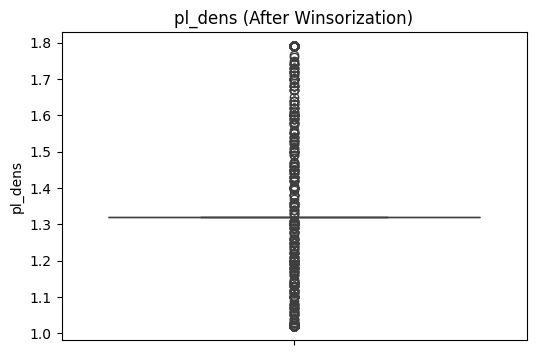

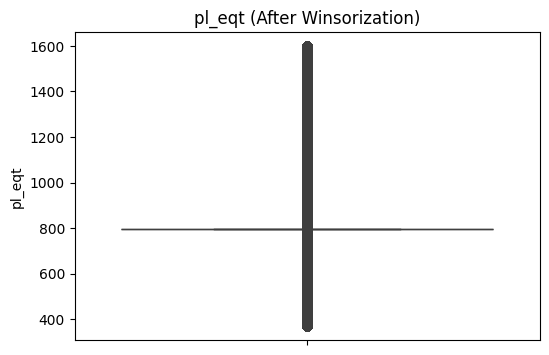

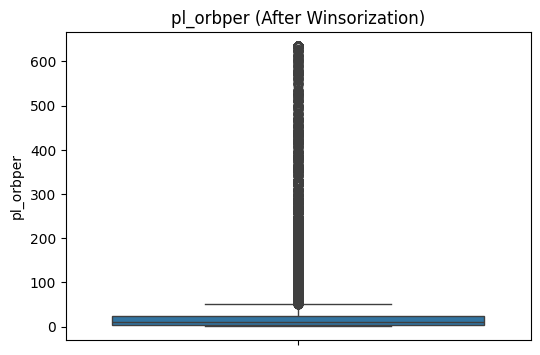

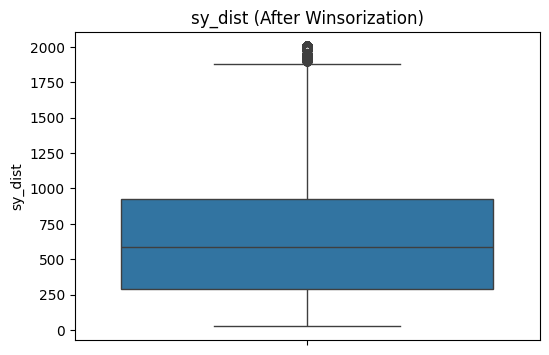

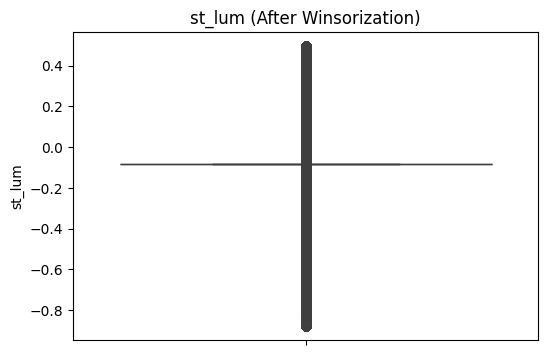

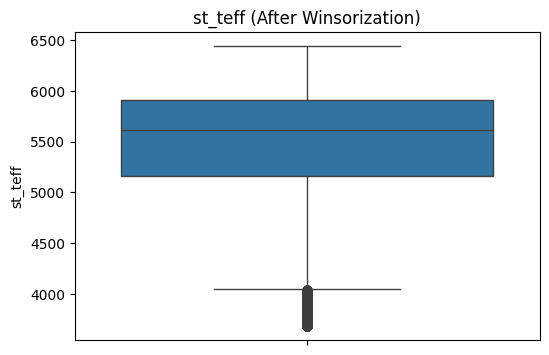

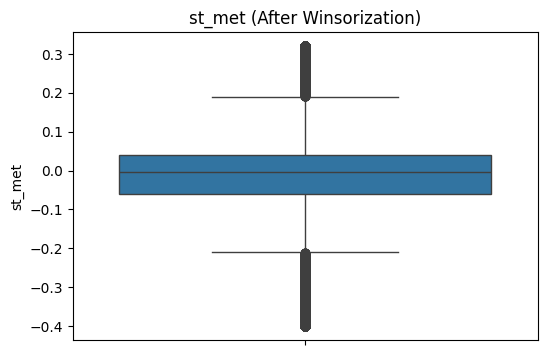

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"{col} (After Winsorization)")
    plt.ylabel(col)
    plt.show()


In [ ]:
print(df.shape)
print(df[num_cols].describe())

(39212, 15)
            pl_rade     pl_bmasse       pl_dens        pl_eqt     pl_orbper  \
count  39212.000000  39212.000000  39212.000000  39212.000000  39212.000000   
mean       3.204908    227.650521      1.325453    826.580225     45.694280   
std        3.068388    201.286107      0.098648    243.395797    120.333469   
min        0.940000      7.530000      1.020000    370.100000      1.252752   
25%        1.880000    192.000000      1.320000    797.000000      4.736209   
50%        2.300000    192.000000      1.320000    797.000000     10.337600   
75%        2.705000    192.000000      1.320000    797.000000     23.668342   
max       14.239500   1175.965106      1.790000   1599.000000    634.600000   

            sy_dist        st_lum       st_teff        st_met  
count  39212.000000  39212.000000  39212.000000  39212.000000  
mean     660.942485     -0.089799   5461.314052     -0.012360  
std      484.087303      0.228387    672.843212      0.153436  
min       26.492700 

In [ ]:
#min-max scaling for numerical columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])
df.head(40)

,pl_rade,pl_bmasse,pl_dens,pl_eqt,pl_orbper,sy_dist,st_lum,st_teff,st_met,st_spectral_class_B,st_spectral_class_F,st_spectral_class_G,st_spectral_class_K,st_spectral_class_M,st_spectral_class_Other
0,0.102259,1.000000,0.38961,0.347384,0.508342,0.033683,1.000000,0.431884,0.194444,0,0,1,0,0,0
1,0.102259,1.000000,0.38961,0.347384,0.512795,0.033683,1.000000,0.384058,0.069444,0,0,1,0,0,0
2,0.102259,1.000000,0.38961,0.347384,0.014344,0.033683,0.579968,0.699638,0.552083,0,0,1,0,0,0
3,0.102259,1.000000,0.38961,0.347384,0.813088,0.049914,0.579968,0.238406,0.611111,0,0,0,1,0,0
4,0.102259,1.000000,0.38961,0.347384,0.813088,0.049914,0.579968,0.192391,0.527778,0,0,1,0,0,0
5,0.102259,1.000000,0.38961,0.347384,0.014344,0.049914,0.579968,0.699638,0.552083,0,0,1,0,0,0
6,0.102259,0.863950,0.38961,0.347384,0.014344,0.024721,0.579968,0.699638,0.552083,0,0,1,0,0,0
7,0.102259,0.961646,0.38961,0.347384,0.292900,0.024721,1.000000,0.436957,0.263889,0,0,0,1,0,0
8,0.102259,1.000000,0.38961,0.347384,0.291447,0.024721,1.000000,0.409783,0.222222,0,0,0,1,0,0
9,0.102259,1.000000,0.38961,0.347384,1.000000,0.000000,0.579968,0.699638,0.552083,0,0,1,0,0,0


In [ ]:
#skewness
df[num_cols].skew()


,0
pl_rade,2.650413
pl_bmasse,3.759238
pl_dens,2.306404
pl_eqt,1.258730
pl_orbper,4.136913
sy_dist,0.896203
st_lum,-0.876696
st_teff,-1.054916
st_met,-0.348161


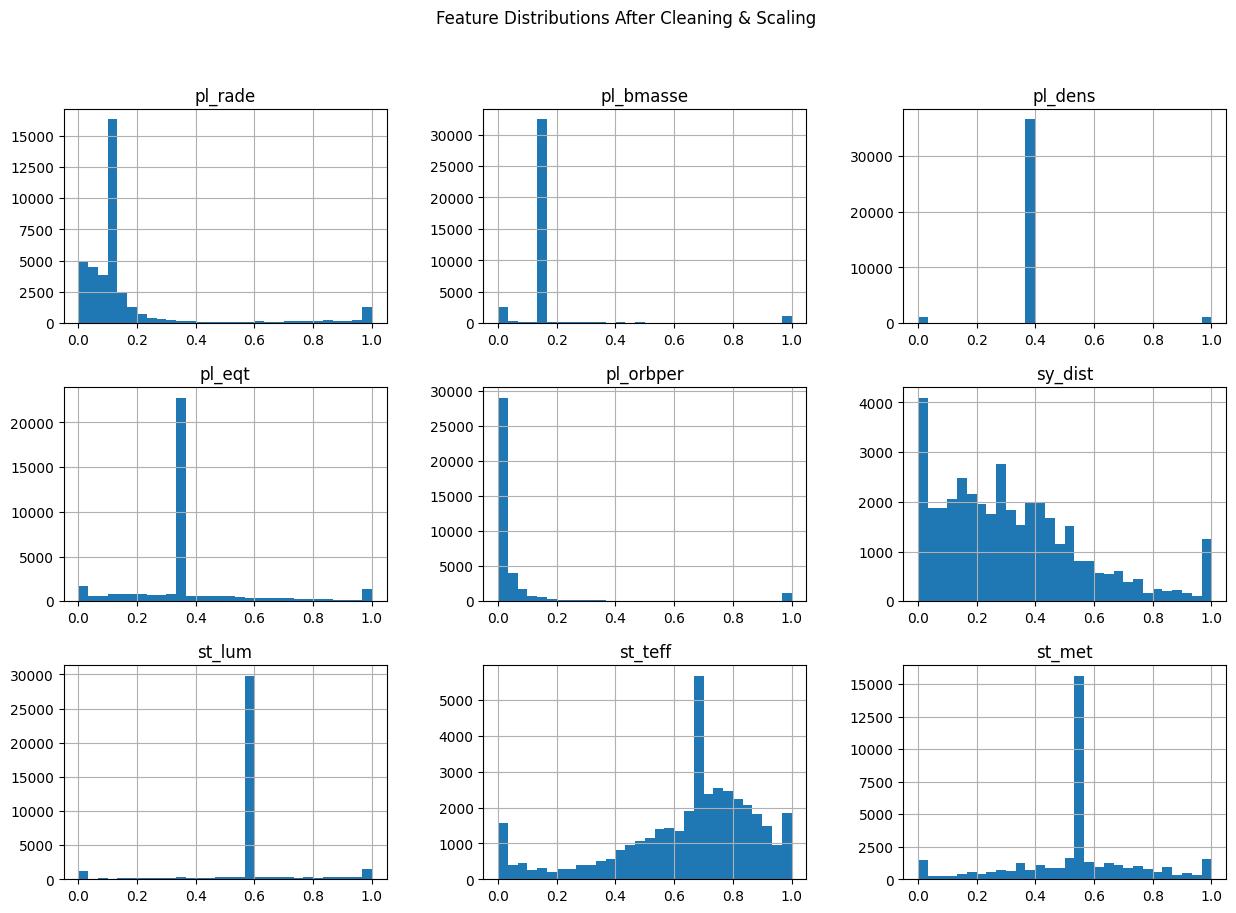

In [ ]:
#histogram for features
df[num_cols].hist(bins=30, figsize=(15,10))
plt.suptitle("Feature Distributions After Cleaning & Scaling")
plt.show()


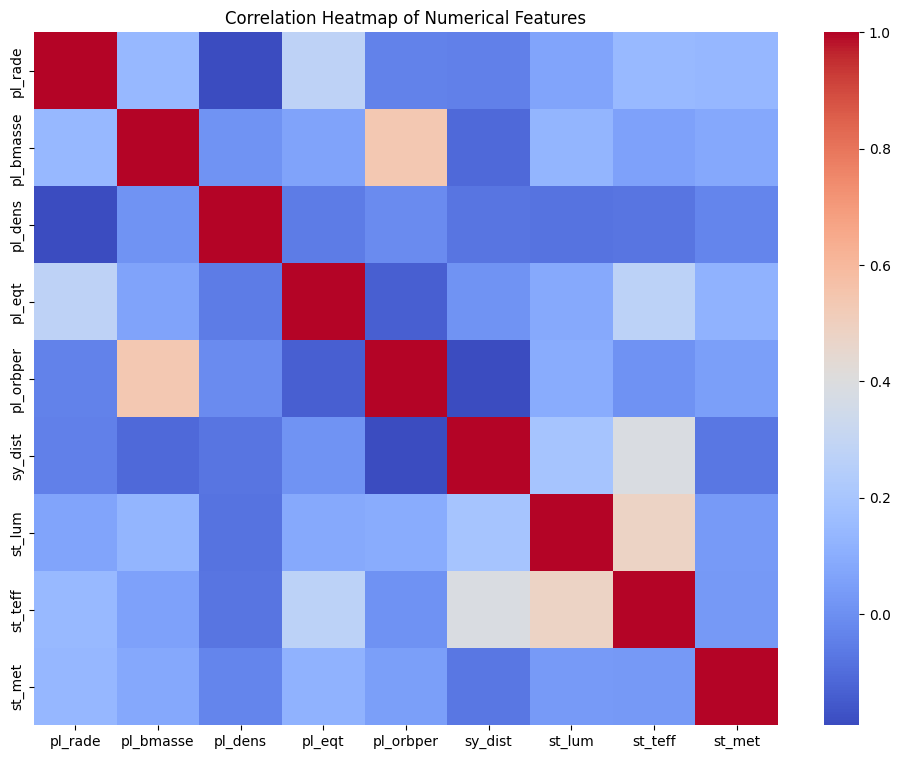

In [ ]:
#correlation analysis with the help of heatmap
plt.figure(figsize=(12,9))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [ ]:
#Habitibility Score Index
# Define weights (sum = 1.0)
hsi_weights = {
    'pl_rade': 0.25,     # Earth-like size
    'pl_bmasse': 0.20,   # Atmospheric retention
    'pl_dens': 0.20,     # Rocky composition
    'pl_eqt': 0.20,      # Temperature suitability
    'pl_orbper': 0.15    # Climate stability
}

# Compute Habitability Score Index
df['Habitability_Score'] = (
    hsi_weights['pl_rade'] * df['pl_rade'] +
    hsi_weights['pl_bmasse'] * df['pl_bmasse'] +
    hsi_weights['pl_dens'] * df['pl_dens'] +
    hsi_weights['pl_eqt'] * df['pl_eqt'] +
    hsi_weights['pl_orbper'] * df['pl_orbper']
)

# Normalize final score (optional but recommended)
df['Habitability_Score'] = (
    df['Habitability_Score'] - df['Habitability_Score'].min()
) / (
    df['Habitability_Score'].max() - df['Habitability_Score'].min()
)

df[['Habitability_Score']].head(1000)


,Habitability_Score
0,0.477681
1,0.478495
2,0.387401
3,0.533374
4,0.533374
...,...
995,0.273061
996,0.180144
997,0.380110
998,0.153889


In [ ]:
spectral_scores = {
    'st_spectral_class_O': 0.0,
    'st_spectral_class_B': 0.1,
    'st_spectral_class_A': 0.2,
    'st_spectral_class_F': 0.4,
    'st_spectral_class_G': 0.7,
    'st_spectral_class_K': 0.85,
    'st_spectral_class_M': 1.0,
    'st_spectral_class_Other': 0.3
}

df['st_spectral_score'] = 0.0

for col, score in spectral_scores.items():
    if col in df.columns:
        df.loc[df[col] == 1, 'st_spectral_score'] = score


In [ ]:
df['stellar_compatibility_index'] = (
    0.45 * df['st_spectral_score'] +
    0.25 * (1 - abs(df['st_teff'] - 0.5)) +   # favors Sun-like temps
    0.20 * df['st_lum'] +
    0.10 * df['st_met']
)


In [ ]:
df['stellar_compatibility_index'].head(1000)

,stellar_compatibility_index
0,0.767415
1,0.742959
2,0.686292
3,0.744206
4,0.656869
...,...
995,0.672811
996,0.639749
997,0.603750
998,0.629826


In [ ]:
#FINAL HABITABILITY SCORE
FINAL_WEIGHTS = {
    'HSI': 0.8,   # Planet properties
    'SCI': 0.2    # Host star influence
}


In [ ]:
df['final_habitability_score'] = (
    FINAL_WEIGHTS['HSI'] * df['Habitability_Score'] +
    FINAL_WEIGHTS['SCI'] * df['stellar_compatibility_index']
)


In [ ]:
df['final_habitability_score'] = df['final_habitability_score'].clip(0, 1)
df[['Habitability_Score', 'stellar_compatibility_index', 'final_habitability_score']].head(1000)


,Habitability_Score,stellar_compatibility_index,final_habitability_score
0,0.477681,0.767415,0.535628
1,0.478495,0.742959,0.531387
2,0.387401,0.686292,0.447179
3,0.533374,0.744206,0.575541
4,0.533374,0.656869,0.558073
...,...,...,...
995,0.273061,0.672811,0.353011
996,0.180144,0.639749,0.272065
997,0.380110,0.603750,0.424838
998,0.153889,0.629826,0.249077


**MILESTONE 2**